# Stock Forecasting using statsmodels and ARCH

https://arch.readthedocs.io/en/latest/univariate/introduction.html  
https://github.com/bashtage/arch/  
https://www.statsmodels.org/stable/index.html  
https://github.com/statsmodels/statsmodels  


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


from datetime import datetime
import statsmodels.api as sm
from arch.unitroot import KPSS, ADF
from statsmodels.stats.outliers_influence import summary_table

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2019-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [4]:
df.tail

<bound method NDFrame.tail of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  2510.030029   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  2447.889893   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  2531.939941   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  2549.689941   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  2574.409912   
...                 ...          ...          ...          ...          ...   
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  3863.159912   
2022-07-18  3883.790039  3902.439941  3818.629883  3830.850098  3830.850098   
2022-07-19  3860.729980  3939.810059  3860.729980  3936.689941  3936.689941   
2022-07-20  3935.320068  3974.129883  3922.030029  3959.899902  3959.899902   
2022-07-21  3955.46997

In [5]:
df_month = df.resample('M').last()

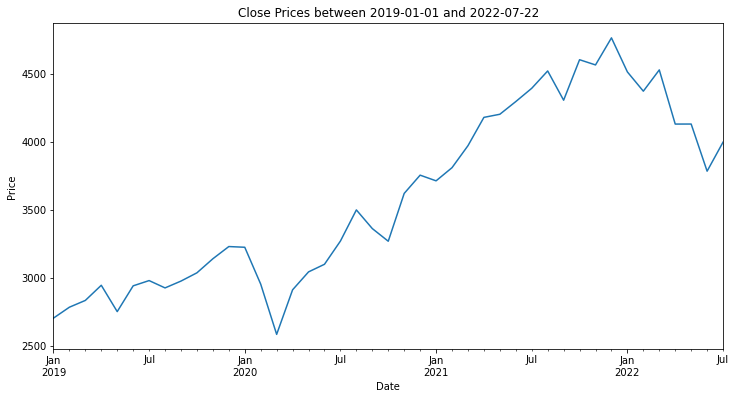

In [6]:
plt.figure(figsize = (12, 6))
plt.title('Close Prices between {} and {}'.format(
    start,
    end
))
df_month['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [7]:
df_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,2685.489990,2708.949951,2678.649902,2704.100098,2704.100098,4917650000
2019-02-28,2788.110107,2793.729980,2782.510010,2784.489990,2784.489990,4396930000
2019-03-31,2828.270020,2836.030029,2819.229980,2834.399902,2834.399902,3740700000
2019-04-30,2937.139893,2948.219971,2924.110107,2945.830078,2945.830078,3919330000
2019-05-31,2766.149902,2768.979980,2750.520020,2752.060059,2752.060059,3981020000


In [8]:
df_month.index.freq

<MonthEnd>

In [9]:
df_month=df_month.rename(columns={"Close": "Price"}, inplace=False)
df_month
df2 = df_month.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df2

,Price
Date,
2019-01-31,2704.100098
2019-02-28,2784.489990
2019-03-31,2834.399902
2019-04-30,2945.830078
2019-05-31,2752.060059
2019-06-30,2941.760010
2019-07-31,2980.379883
2019-08-31,2926.459961
2019-09-30,2976.739990


Dickey–Fuller test: p=0.620703


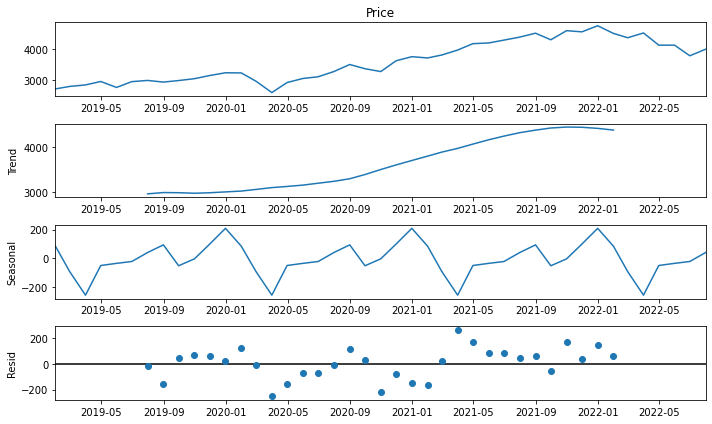

In [10]:
plt.rc("figure", figsize=(10,6))
sm.tsa.seasonal_decompose(df2.Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df2.Price)[1])
plt.show()

In [11]:
ADF(df2.Price)

Test Statistic,-1.318
P-value,0.621
Lags,0


Dickey–Fuller test: p=0.774782


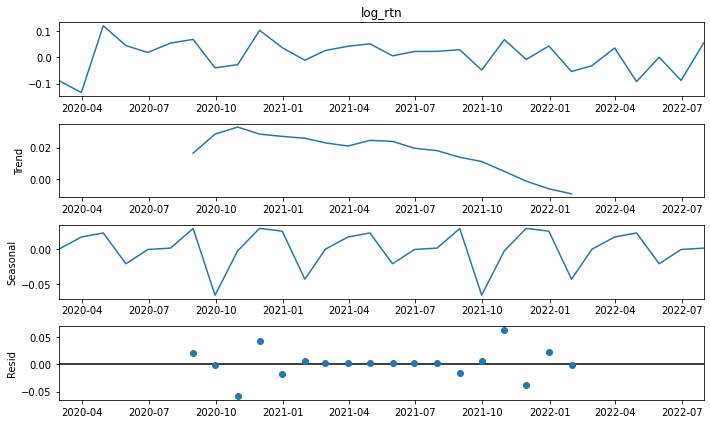

In [12]:
df2['log_rtn'] = np.log(df2.Price/df2.Price.shift(1))
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df2.log_rtn[13:])[1])

# STL-decomposition
sm.tsa.seasonal_decompose(df2.log_rtn[13:]).plot()   

plt.show()

In [13]:
df2=df2.dropna(axis=0)
df2.isnull().sum()

Price      0
log_rtn    0
dtype: int64

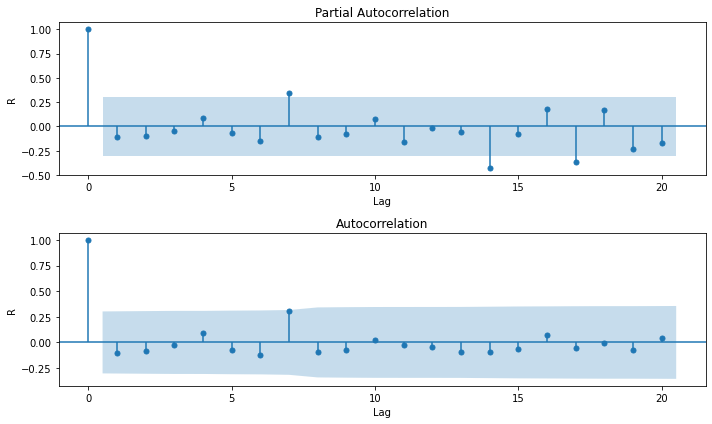

In [14]:
fig, axs = plt.subplots(2)
sm.graphics.tsa.plot_pacf(df2.log_rtn, lags=20, ax=axs[0])
axs[0].set_ylabel('R')
axs[0].set_xlabel('Lag')
sm.graphics.tsa.plot_acf(df2.log_rtn, lags=20, ax=axs[1]);
axs[1].set_ylabel('R')
axs[1].set_xlabel('Lag')
fig.tight_layout()

In [15]:
from itertools import product

Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df2.Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    
    bic = model.bic
    best_bic = bic   
    if bic < best_bic:
        best_model = model
        best_bic = bic
        best_param = param
    results.append([param, model.bic])

In [16]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'bic']
print(result_table.sort_values(by = 'bic', ascending=True).head())
bic_model=sm.tsa.statespace.SARIMAX(df2.Price, order=(1,1,1), 
                                        seasonal_order=(1,1,1, 12)).fit(disp=-1)
print(bic_model.summary())

      parameters         bic
1   (0, 0, 0, 1)  407.663771
3   (0, 0, 1, 0)  408.029869
0   (0, 0, 0, 0)  409.067238
28  (1, 0, 0, 1)  409.974835
10  (0, 1, 0, 1)  410.219784
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -199.852
Date:                            Sat, 23 Jul 2022   AIC                            409.704
Time:                                    11:28:12   BIC                            416.541
Sample:                                02-28-2019   HQIC                           411.845
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.015456


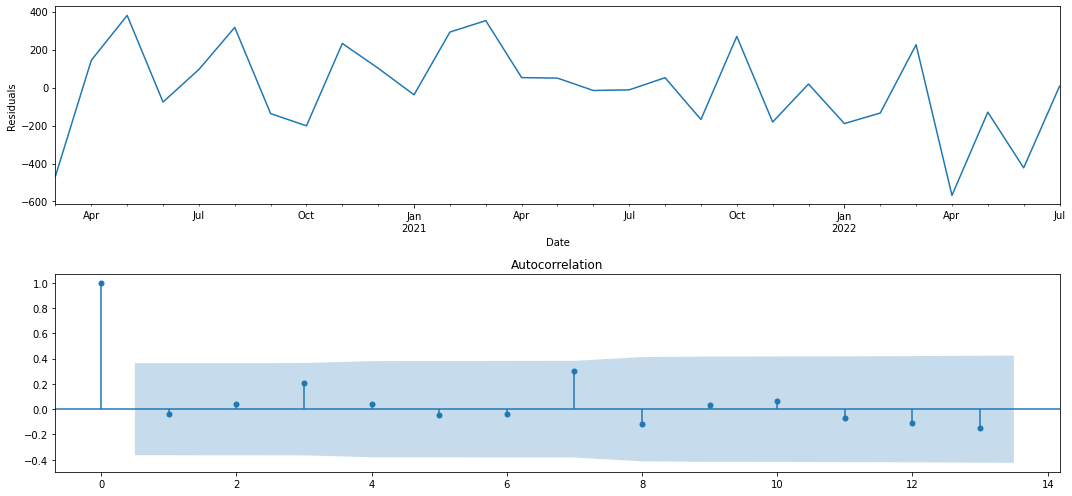

In [17]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
bic_model.resid[13:].plot()
plt.ylabel('Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(bic_model.resid[13:].values.squeeze(), lags=13, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(bic_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [18]:
date_list = [datetime(2022, 8, 31),
             datetime(2022, 9, 30),datetime(2022, 10, 31), datetime(2022, 11, 30),datetime(2022, 12, 31),
             datetime(2023, 1, 31), datetime(2023, 2, 28), datetime(2023, 3, 31), datetime(2023, 4, 30), 
             datetime(2023, 5, 31), datetime(2023, 6, 30), datetime(2023, 7, 31), datetime(2023, 8, 31),
             datetime(2023, 9, 30),datetime(2023, 10, 31), datetime(2023, 11, 30),datetime(2023, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = bic_model.predict(start=20, end=144)


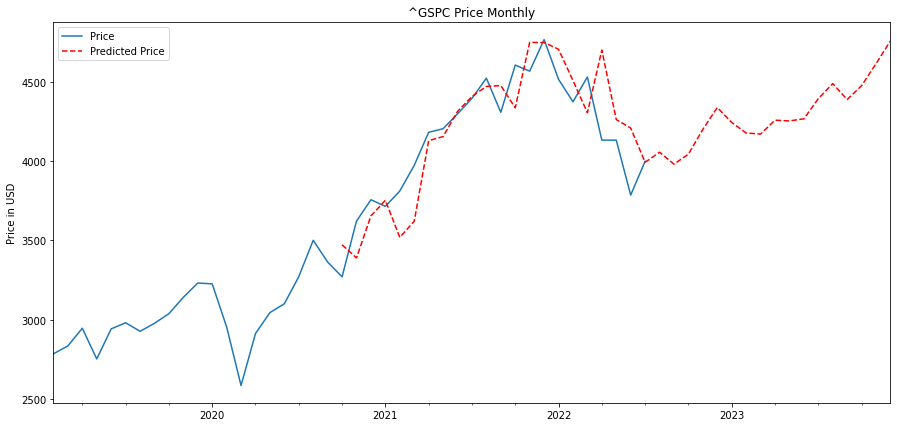

In [19]:
plt.figure(figsize=(15,7))
df2.Price.plot()
df2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title(symbol + ' Price Monthly')
plt.ylabel('Price in USD')
plt.show()

In [20]:
predictions_int = bic_model.get_forecast(steps=24)
predictions_int.predicted_mean

2022-08-31    4055.850308
2022-09-30    3980.416100
2022-10-31    4043.439548
2022-11-30    4200.028978
2022-12-31    4337.588818
2023-01-31    4243.283424
2023-02-28    4177.124468
2023-03-31    4170.317215
2023-04-30    4257.877742
2023-05-31    4253.318585
2023-06-30    4266.414947
2023-07-31    4393.237293
2023-08-31    4488.745900
2023-09-30    4388.000196
2023-10-31    4475.397600
2023-11-30    4614.265319
2023-12-31    4757.782473
2024-01-31    4650.999184
2024-02-29    4579.329961
2024-03-31    4584.868462
2024-04-30    4635.404901
2024-05-31    4631.189260
2024-06-30    4616.846865
2024-07-31    4750.281620
Freq: M, Name: predicted_mean, dtype: float64

In [21]:
predictions_int.conf_int()


,lower Price,upper Price
2022-08-31,3633.586508,4478.114109
2022-09-30,3441.172298,4519.659902
2022-10-31,3387.391239,4699.487858
2022-11-30,3453.237388,4946.820568
2022-12-31,3506.719426,5168.458210
2023-01-31,3337.421118,5149.145731
2023-02-28,3201.711167,5152.537770
2023-03-31,3133.487511,5207.146919
2023-04-30,3163.018104,5352.737379
2023-05-31,3103.367797,5403.269374


In [22]:
conf_df = pd.concat([df2['Price'],predictions_int.predicted_mean, predictions_int.conf_int()], axis = 1)

conf_df.head()

,Price,predicted_mean,lower Price,upper Price
2019-02-28,2784.489990,NaN,NaN,NaN
2019-03-31,2834.399902,NaN,NaN,NaN
2019-04-30,2945.830078,NaN,NaN,NaN
2019-05-31,2752.060059,NaN,NaN,NaN
2019-06-30,2941.760010,NaN,NaN,NaN


In [23]:
conf_df = conf_df.rename(columns={0: 'Predictions', 'lower MI': 'Lower CI', 'upper MI': 'Upper CI'})
conf_df.head()

,Price,predicted_mean,lower Price,upper Price
2019-02-28,2784.489990,NaN,NaN,NaN
2019-03-31,2834.399902,NaN,NaN,NaN
2019-04-30,2945.830078,NaN,NaN,NaN
2019-05-31,2752.060059,NaN,NaN,NaN
2019-06-30,2941.760010,NaN,NaN,NaN


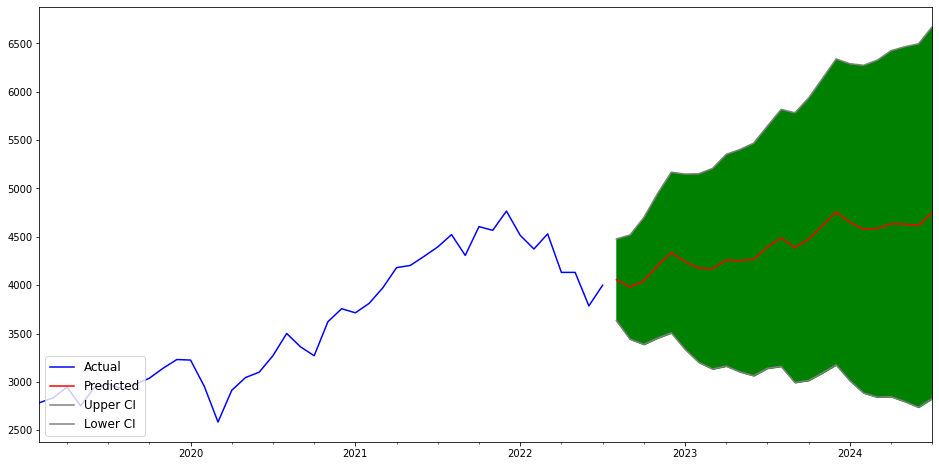

In [24]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = conf_df.index.values


upper = conf_df['upper Price']
lower = conf_df['lower Price']

conf_df['Price'].plot(color = 'blue', label = 'Actual')
conf_df['predicted_mean'].plot(color = 'red',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='green')